In [1]:
import os 
from os import listdir

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:

# List les éléments contenu dans un dossier
def file_list(rep) :
    return [f for f in listdir(rep)]

In [15]:
def annalyseResFile(filename):
    file = filename
    df = pd.read_csv(file, sep=',')
    
    df['dist'] = df.apply(lambda row: np.sqrt((row[1]-row[4])**2+(row[3]-row[6])**2),
                     axis = 1, result_type = 'expand')
    
    distList = df['dist']
    
    plt.figure(figsize=(36,8))
    plt.subplot(1,4,1)
    plt.title(filename[:-4])
    plt.bar(np.arange(len(distList)), distList)
    
    plt.plot([-0.5,len(distList)], [np.mean(distList),np.mean(distList)], linestyle='dashed', c='r')
    plt.plot([-0.5,len(distList)], [distList.quantile(0.5),distList.quantile(0.5)], linestyle='dashed', c='b')
    
    plt.text(len(distList), distList.mean(), str(np.round(np.mean(distList),3)),c='r')
    plt.text(len(distList), distList.quantile(0.5), str(np.round(distList.quantile(0.5),3)),c='b')
    
    plt.xlim((-0.5,len(distList)))
    plt.xlabel('index')
    plt.ylabel('distance en m')
    
    plt.subplot(1,4,2)
    plt.title(filename[:-4])
    cumul_dist_list = [sum(distList[:i]) for i in range(len(distList))]
    plt.bar(np.arange(len(distList)), cumul_dist_list)
    
    plt.plot([-0.5,len(distList)], [distList.mean(),distList.mean()], linestyle='dashed', c='r')
    plt.plot([-0.5,len(distList)], [distList.quantile(0.5),distList.quantile(0.5)], linestyle='dashed', c='b')
    
    plt.text(len(distList), distList.mean(), str(np.round(np.mean(distList),3)),c='r')
    plt.text(len(distList), distList.quantile(0.5), str(np.round(distList.quantile(0.5),3)),c='b')
    
    plt.xlim((-0.5,len(distList)))
    plt.xlabel('index')
    plt.ylabel('distances cumul en m')

    plt.subplot(1,4,3)
    plt.title(filename[:-4])
    #plt.scatter(df["field.target.x"], df["field.target.z"])
    plt.scatter(df["field.impact.x"], df["field.impact.z"], c='tab:orange')
    plt.xlim((min(df["field.target.x"])-0.5,max(df["field.target.x"])+0.5))
    plt.ylim((min(df["field.target.z"])-0.5,max(df["field.target.z"])+0.5))
    plt.xlabel('axe x')
    plt.ylabel('axe z')
    plt.text(df["field.impact.x"][0]+0.02, df["field.impact.z"][0]+0.02, str(df.index[0]))
    
    
    plt.subplot(1,4,4)
    plt.title(filename[:-4])
    plt.scatter(df["field.target.x"], df["field.target.z"])
    plt.scatter(df["field.impact.x"], df["field.impact.z"], c='tab:orange')
    plt.xlim((-2.5,2.5))
    plt.ylim((0,5))
    plt.xlabel('axe x')
    plt.ylabel('axe z')
    plt.text(df["field.impact.x"][0]+0.02, df["field.impact.z"][0]+0.02, str(df.index[0]))
    for i in range(len(df)):
        x = [df["field.impact.x"][i], df["field.target.x"][i]]
        y = [df["field.impact.z"][i], df["field.target.z"][i]]
        plt.plot(x,y, c='b')
    
    
    plt.show()
    
    return df, distList

In [16]:
rep = "Results\\"
files = file_list(rep)
files

['carre_v1.txt',
 'carre_v2.txt',
 'etoile_3_pans_3_drones.txt',
 'etoile_v2.txt',
 'losange_v1.txt',
 'losange_v2.txt',
 'oval_2_walls_2_drones.txt',
 'rond_v2.txt',
 'spirale_v2.txt',
 'spirale_v2_2.txt']

In [ ]:
def split_dataset(columns) :
    
    data_frames = []
    grouped = df.groupby(by = columns)
    listes = list(grouped.count().index)
    for liste in listes :
        data_frames.append(grouped.get_group(liste))
    
    return data_frames


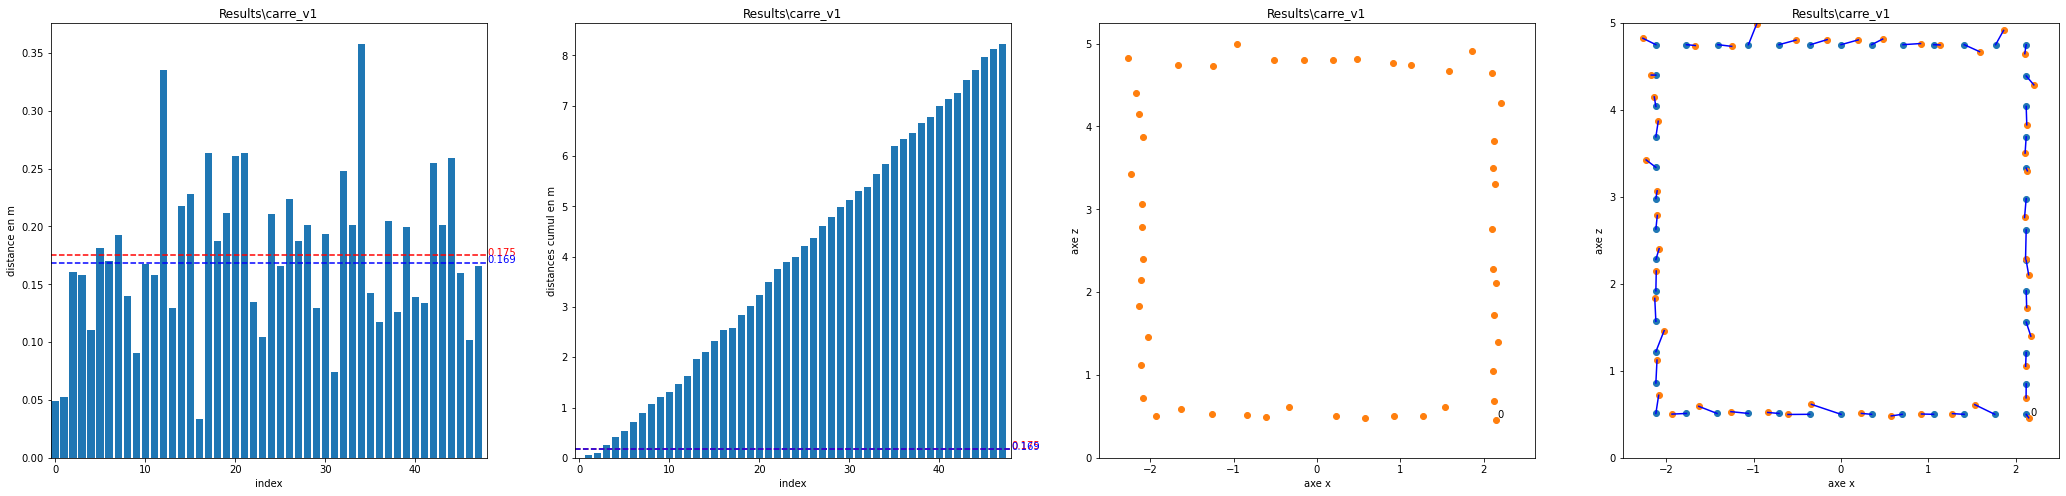

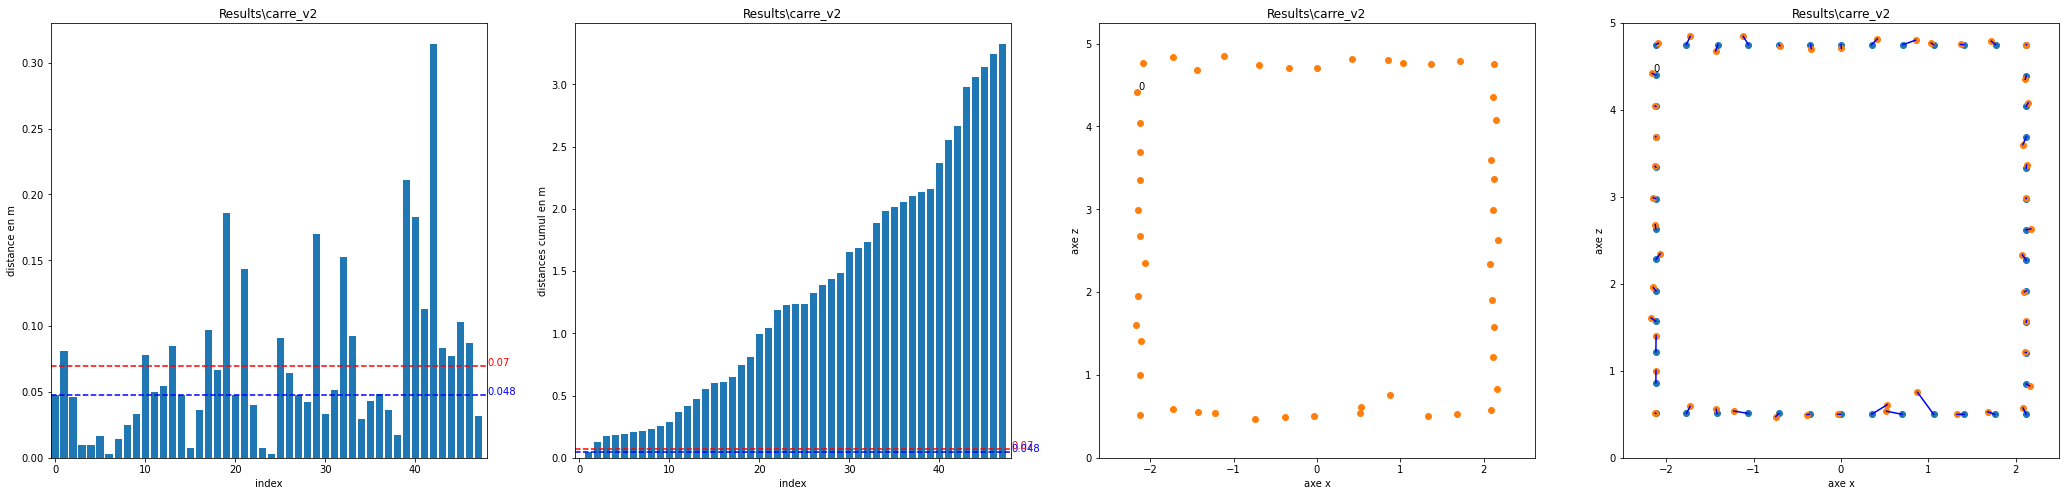

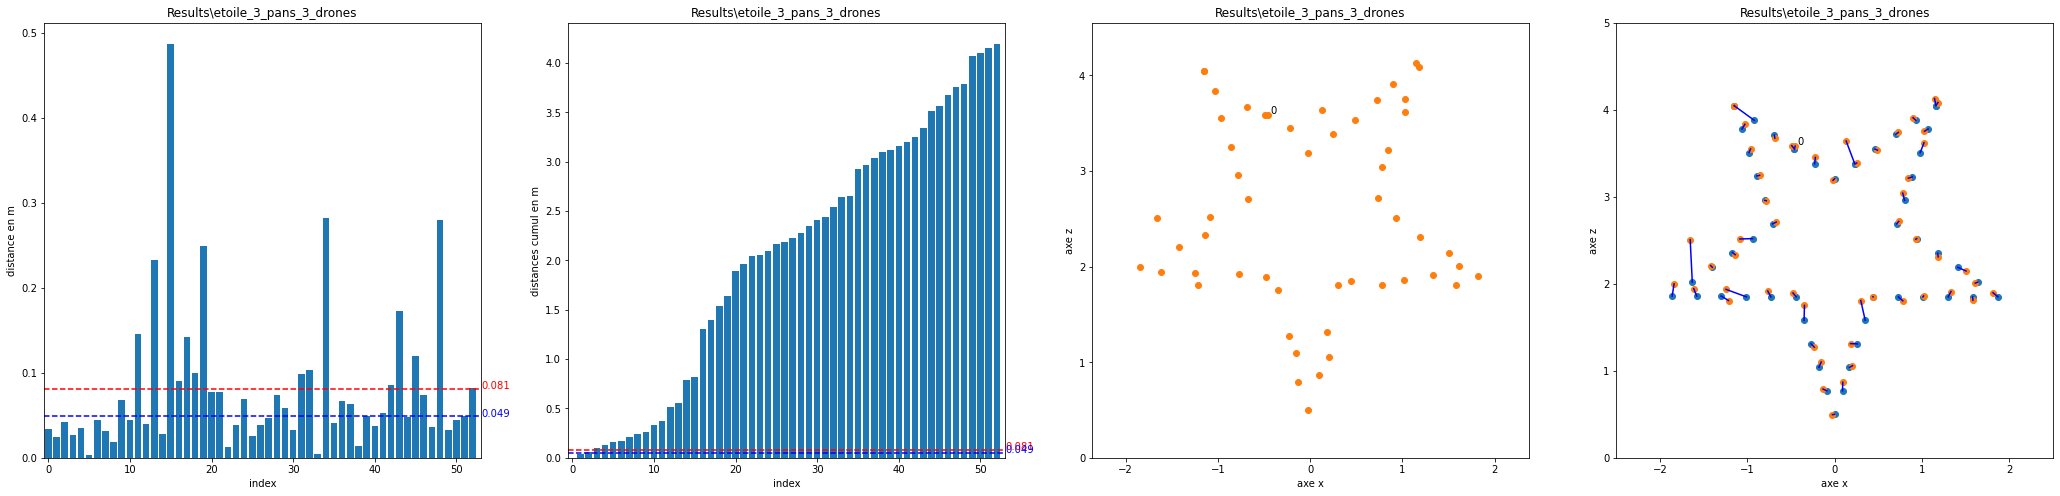

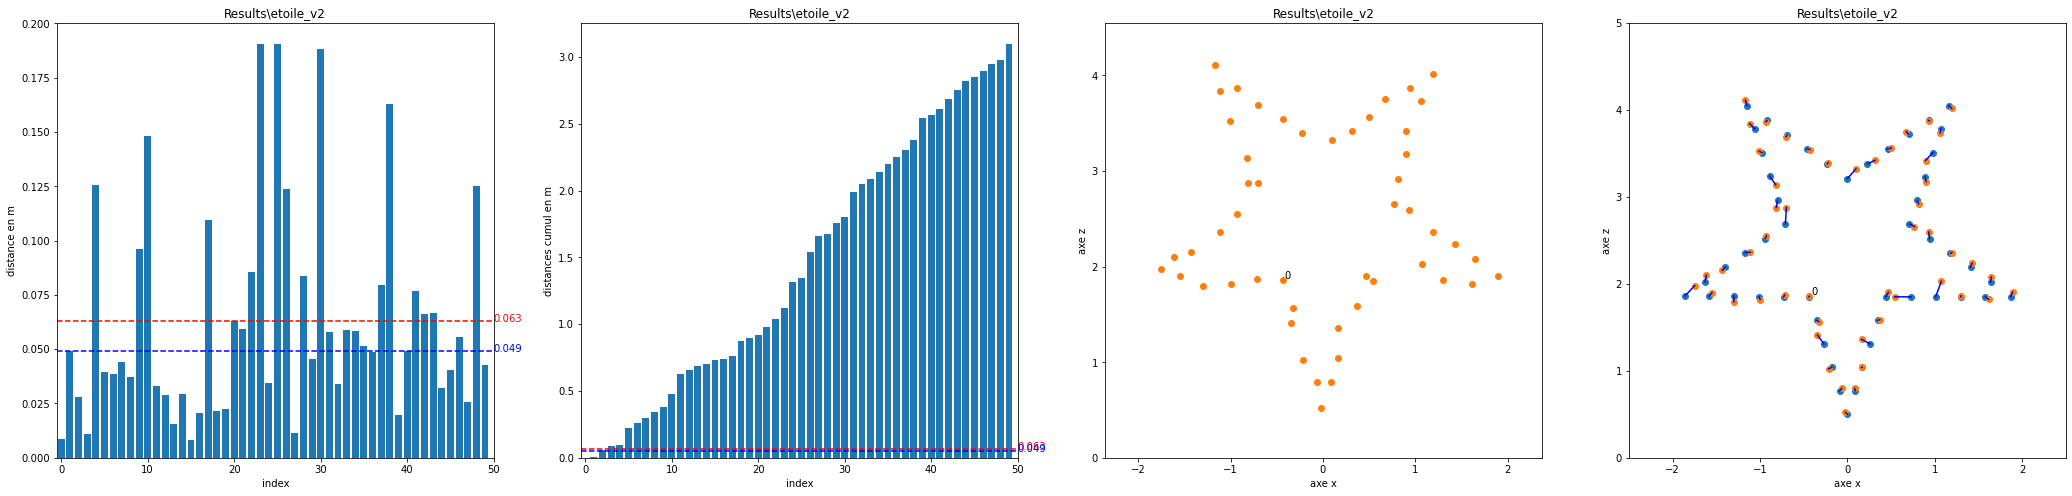

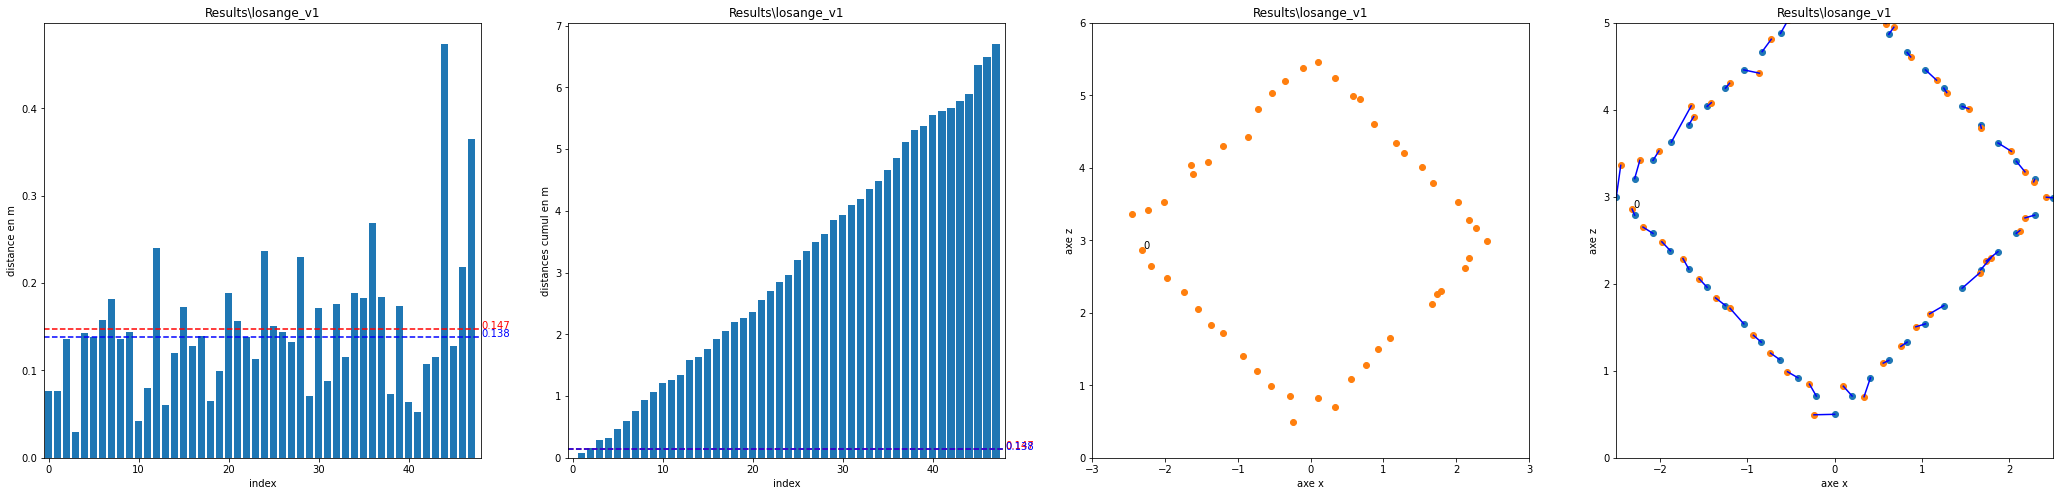

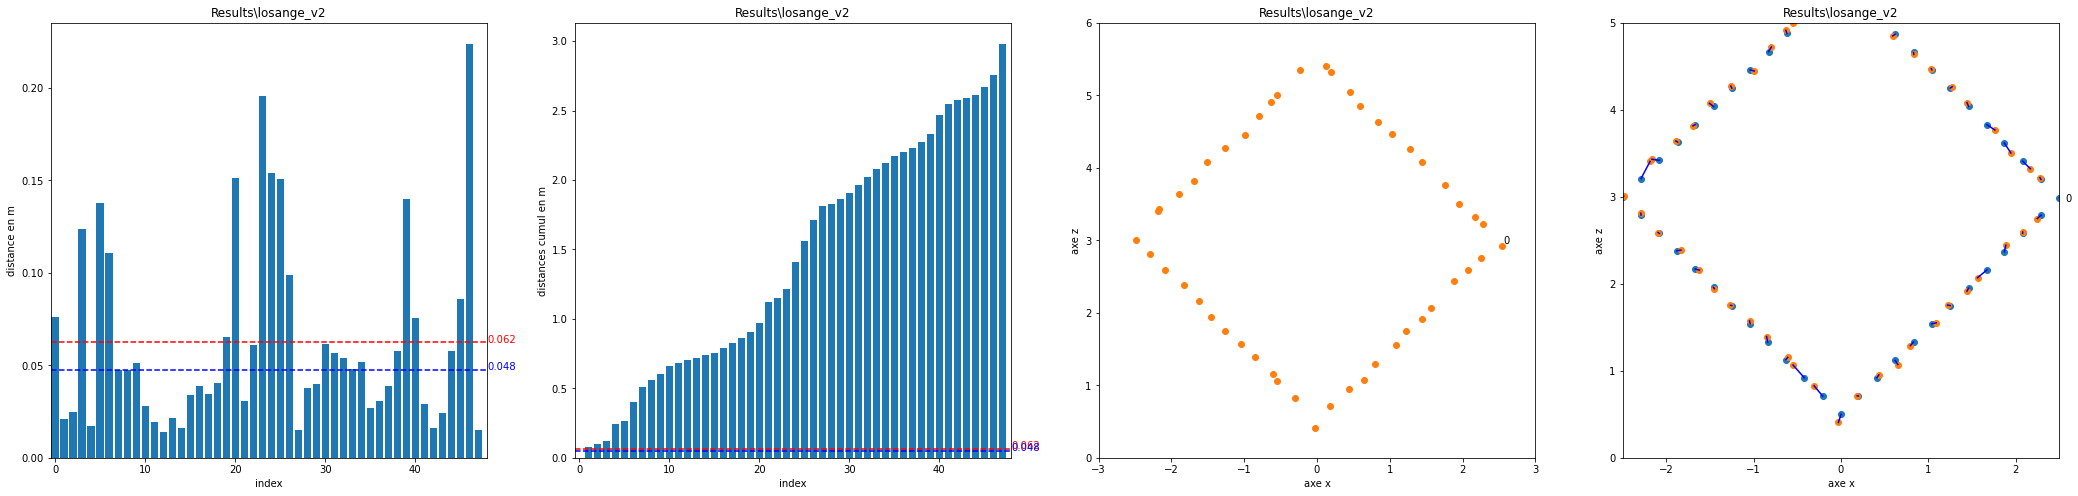

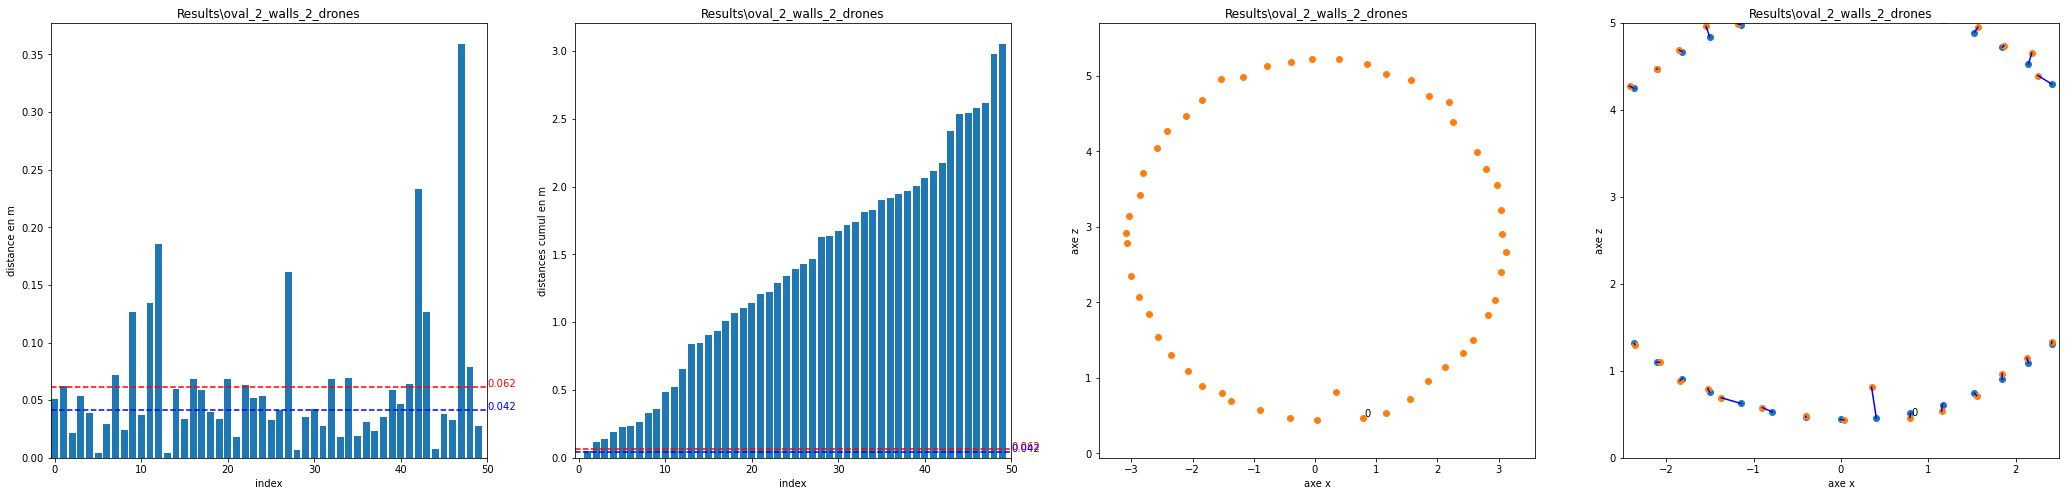

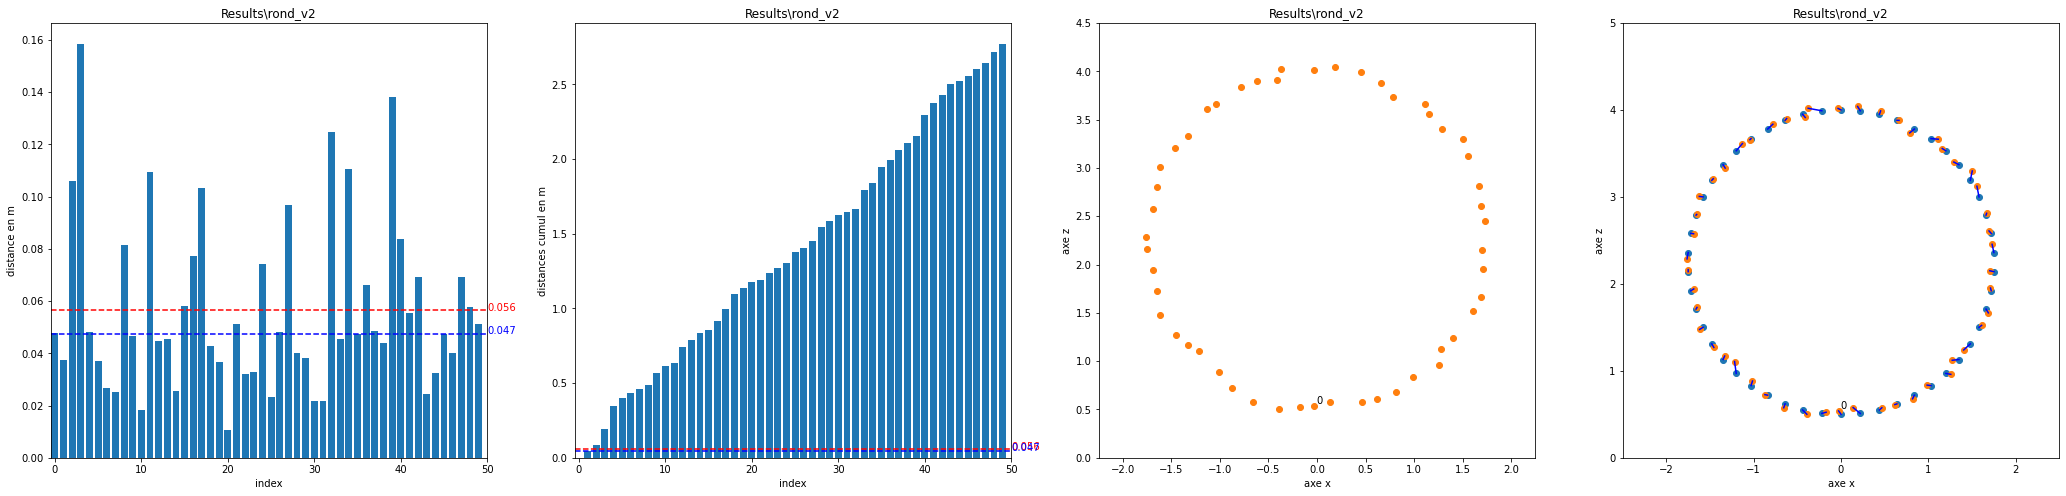

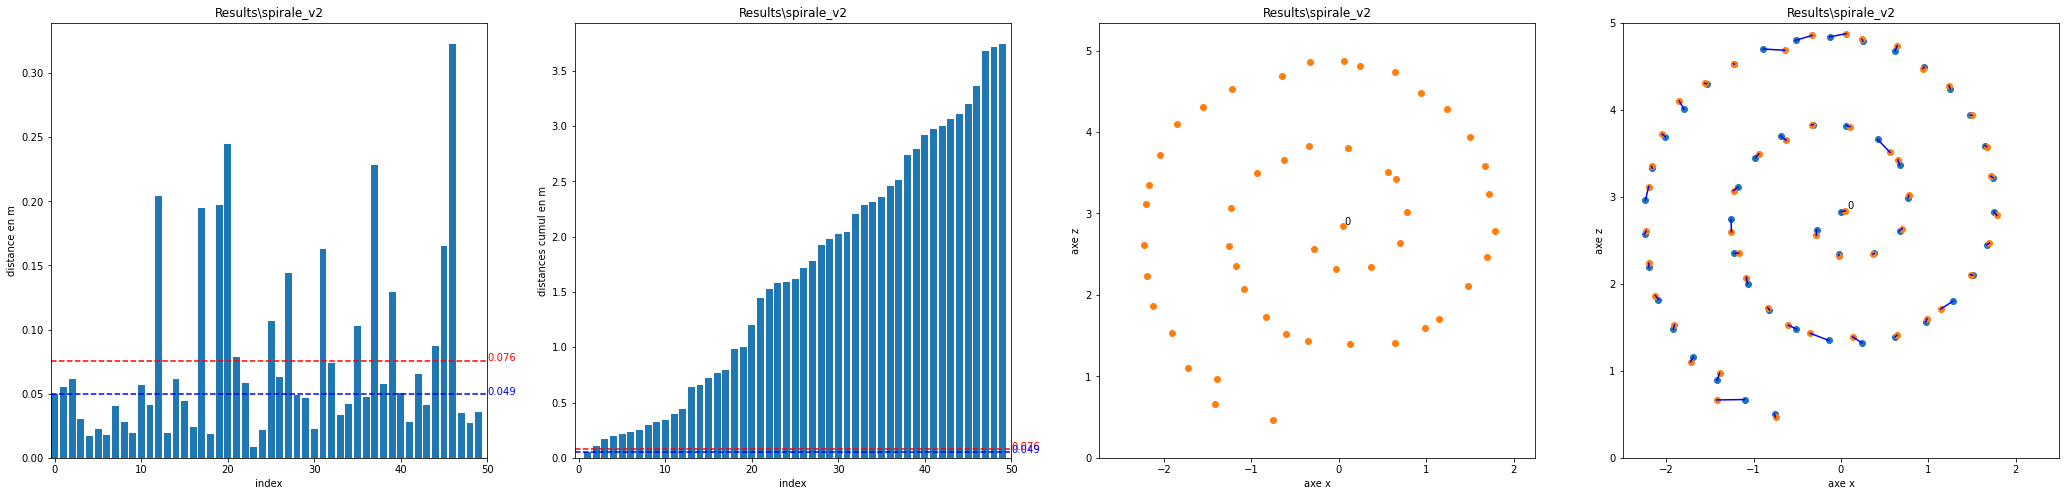

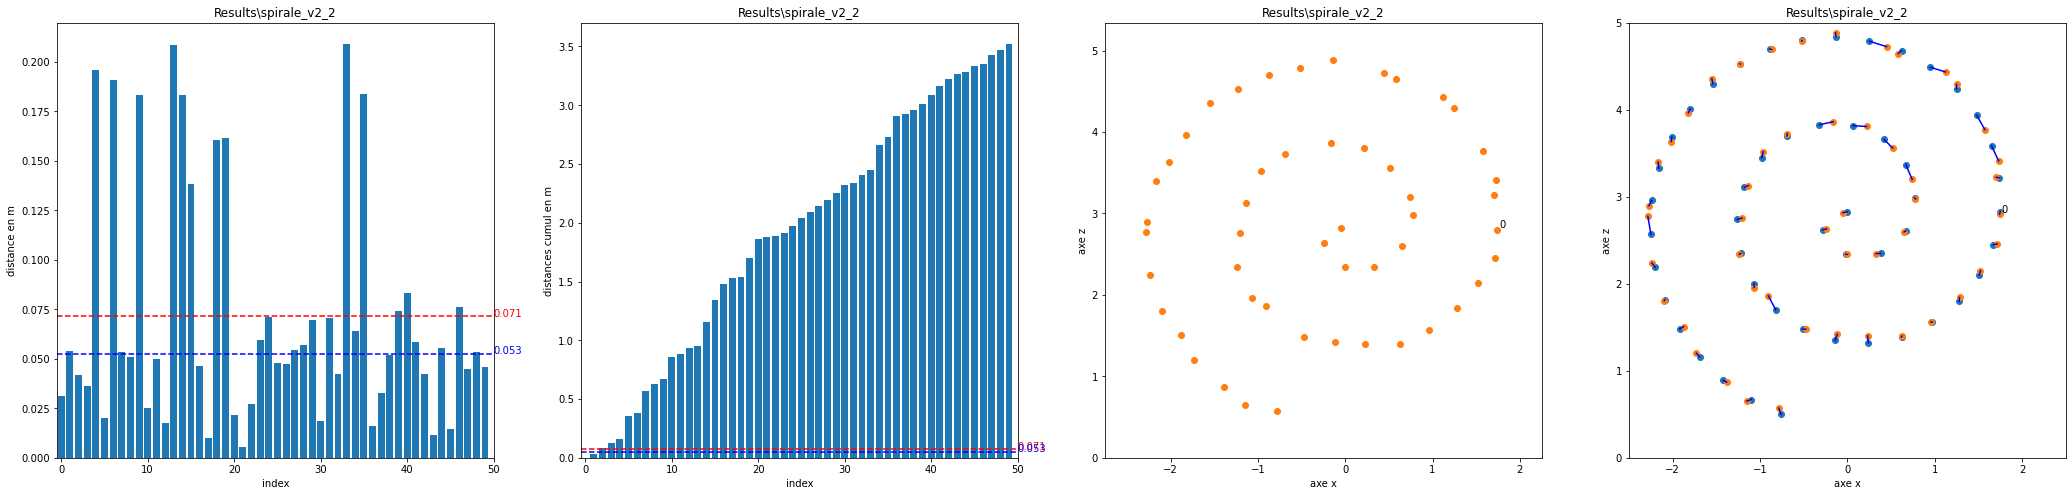

In [17]:
for file in files : 
    carre_10_df, carre_10_distList = annalyseResFile(rep+file)


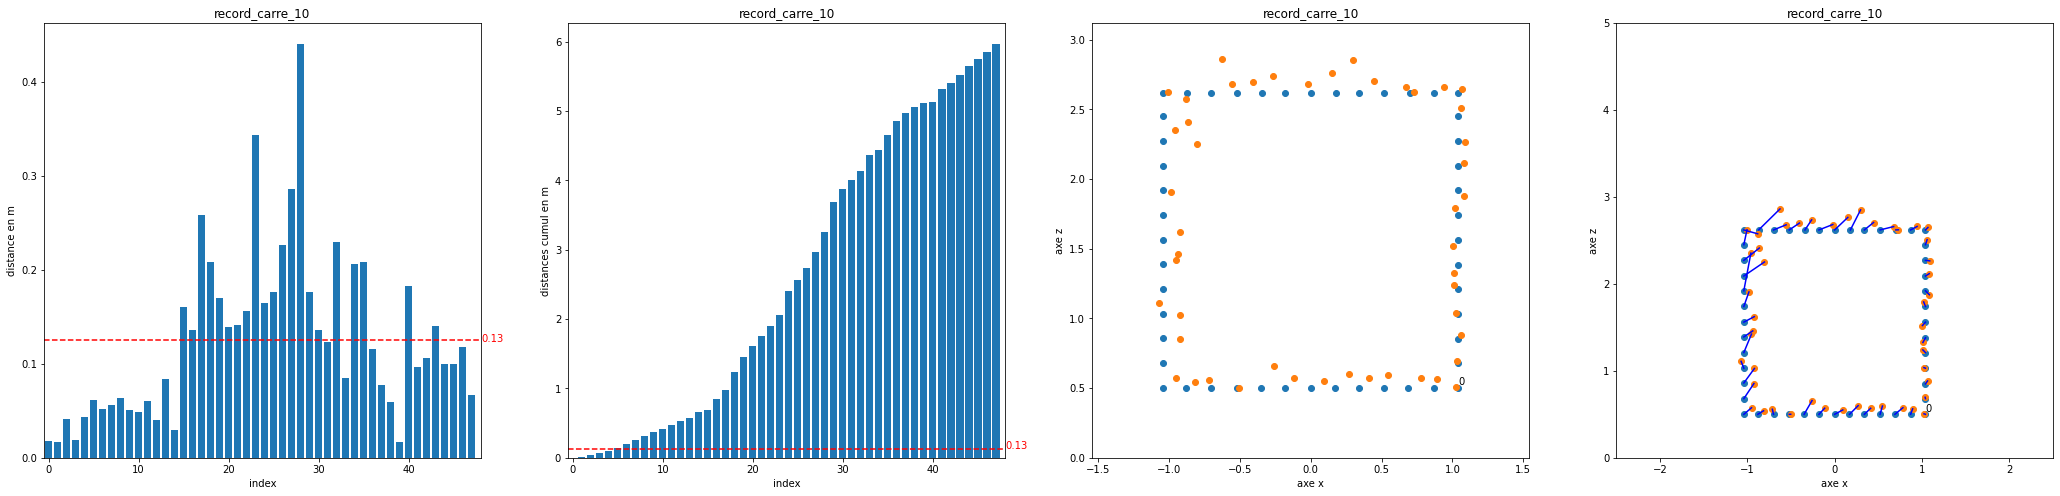

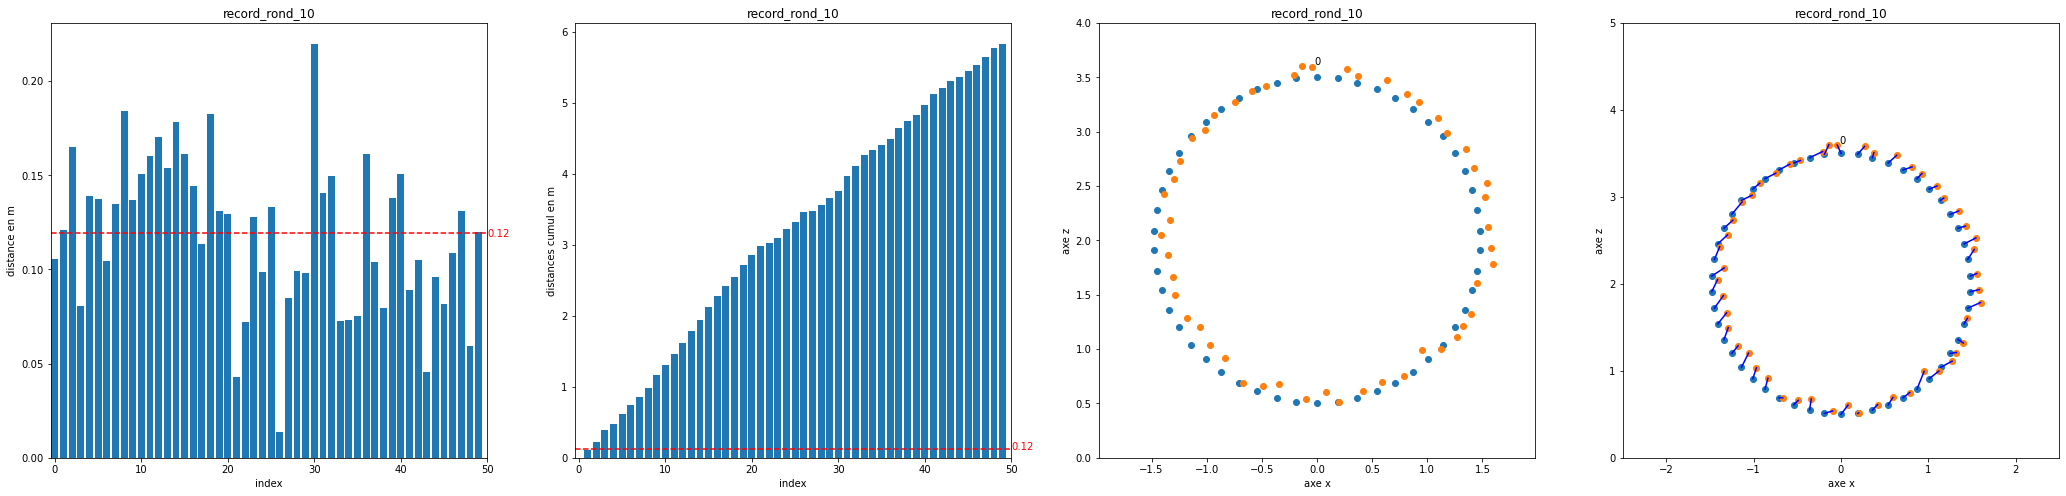

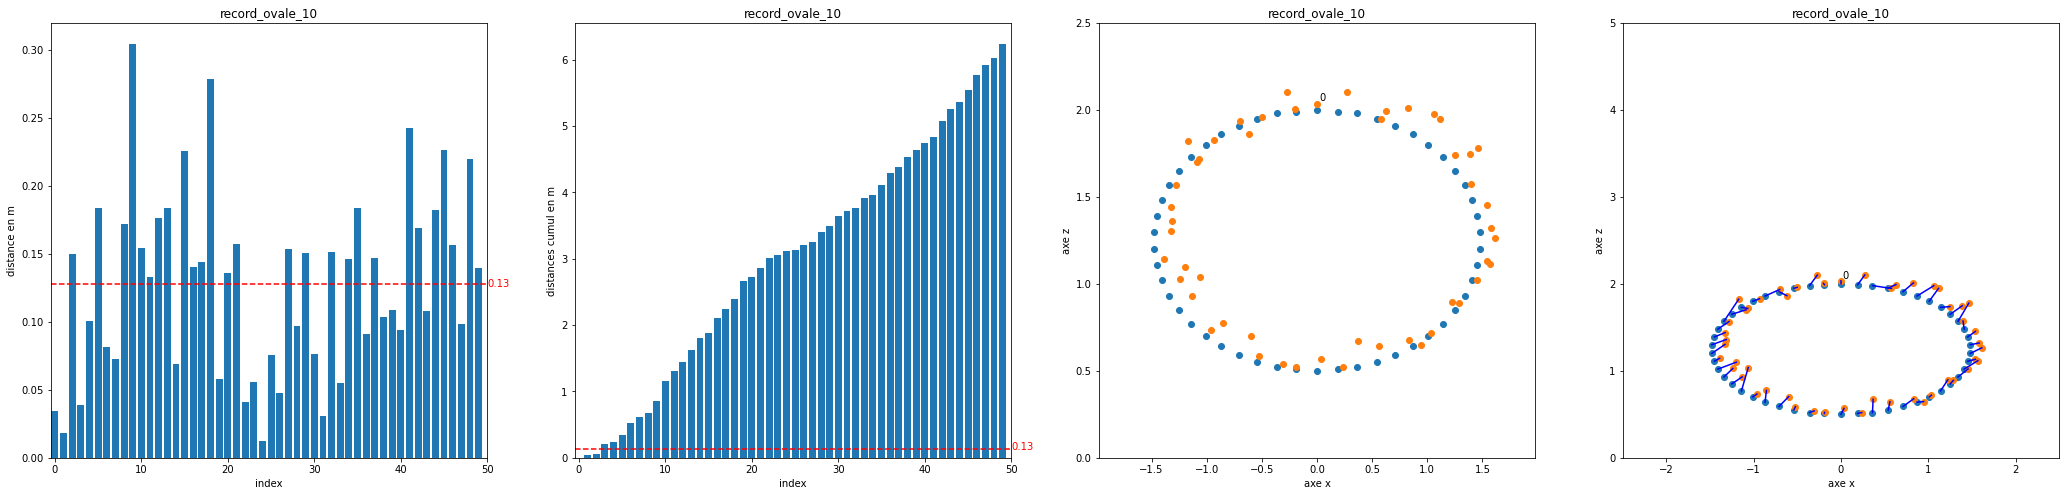

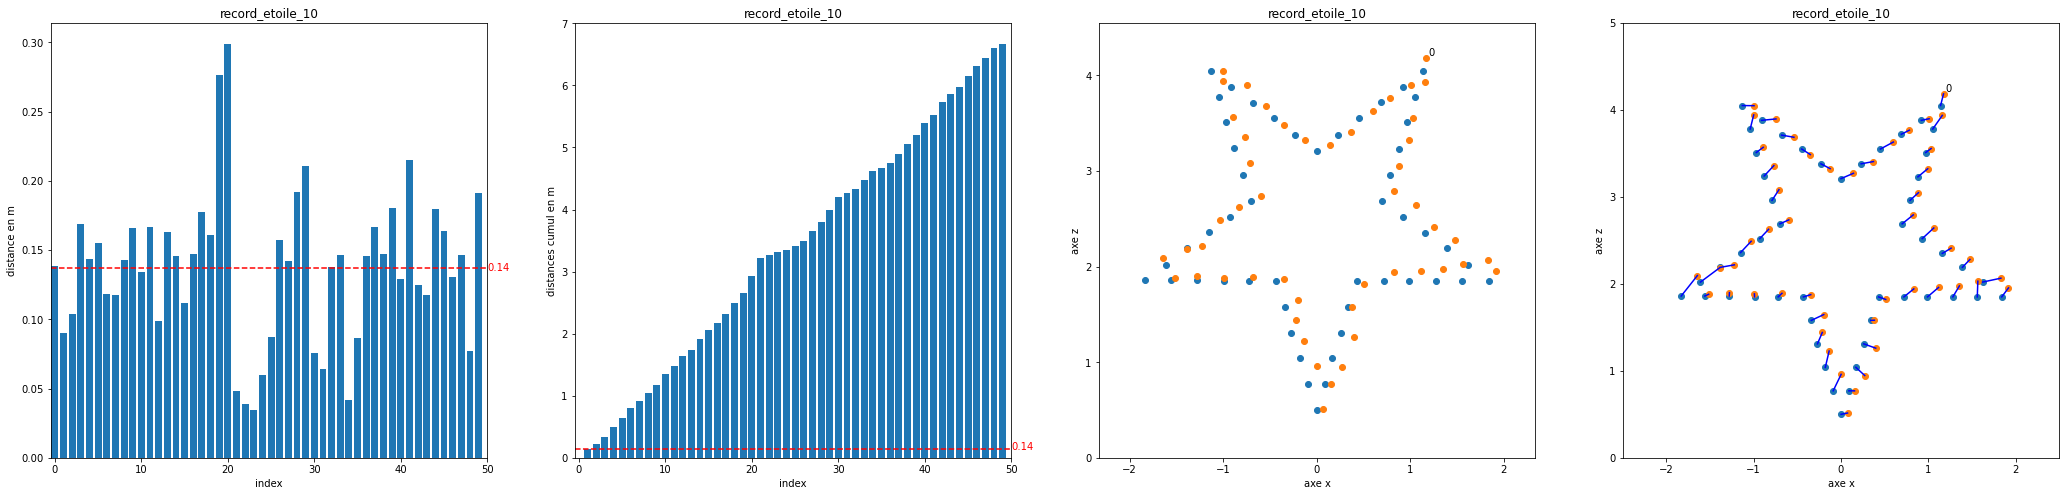

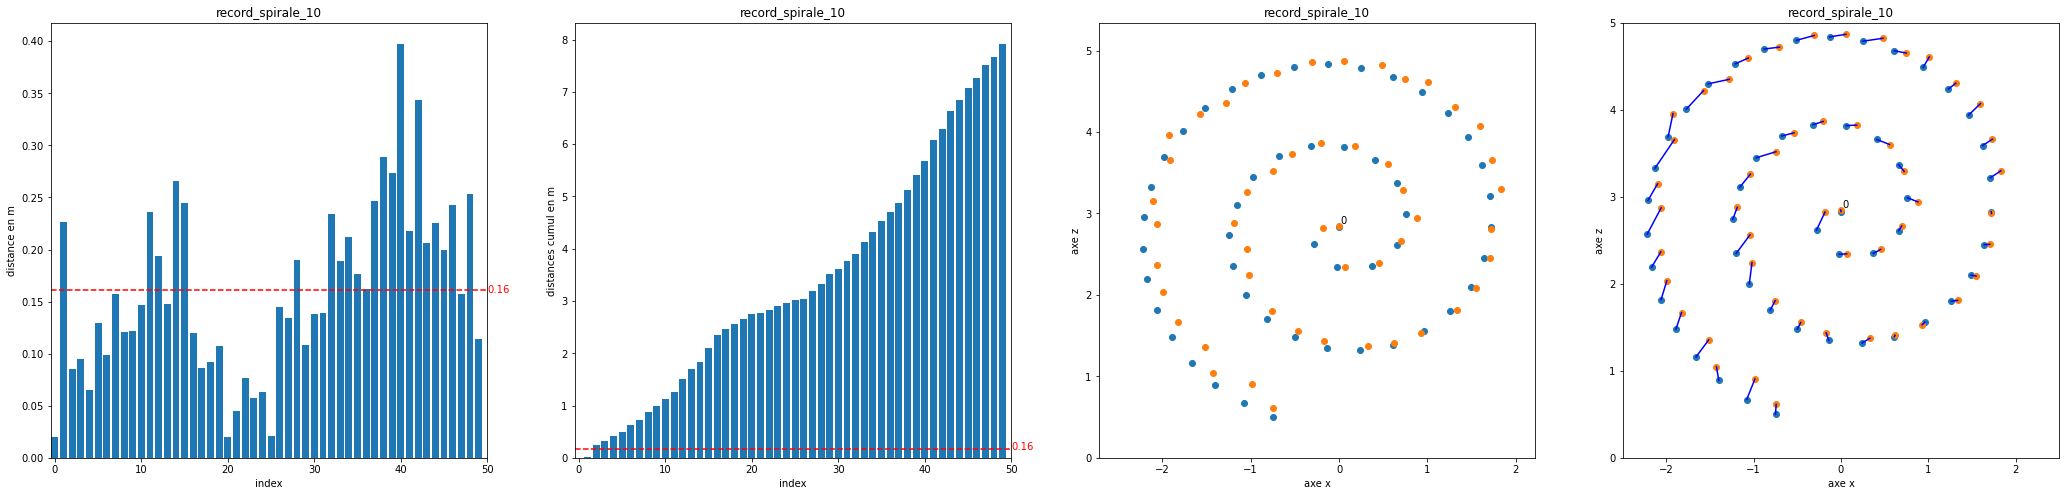

In [18]:
carre_10_df, carre_10_distList = annalyseResFile("record_carre_10.txt")
rond_10_df, rond_10_distList = annalyseResFile("record_rond_10.txt")
ovale_10_df, ovale_10_distList = annalyseResFile("record_ovale_10.txt")
#rectangle_10_df, rectangle_10_distList = annalyseResFile("record_rectangle_10.txt")
etoile_10_df, etoile_10_distList = annalyseResFile("record_etoile_10.txt")
spirale_10_df, spirale_10_distList = annalyseResFile("record_spirale_10.txt")

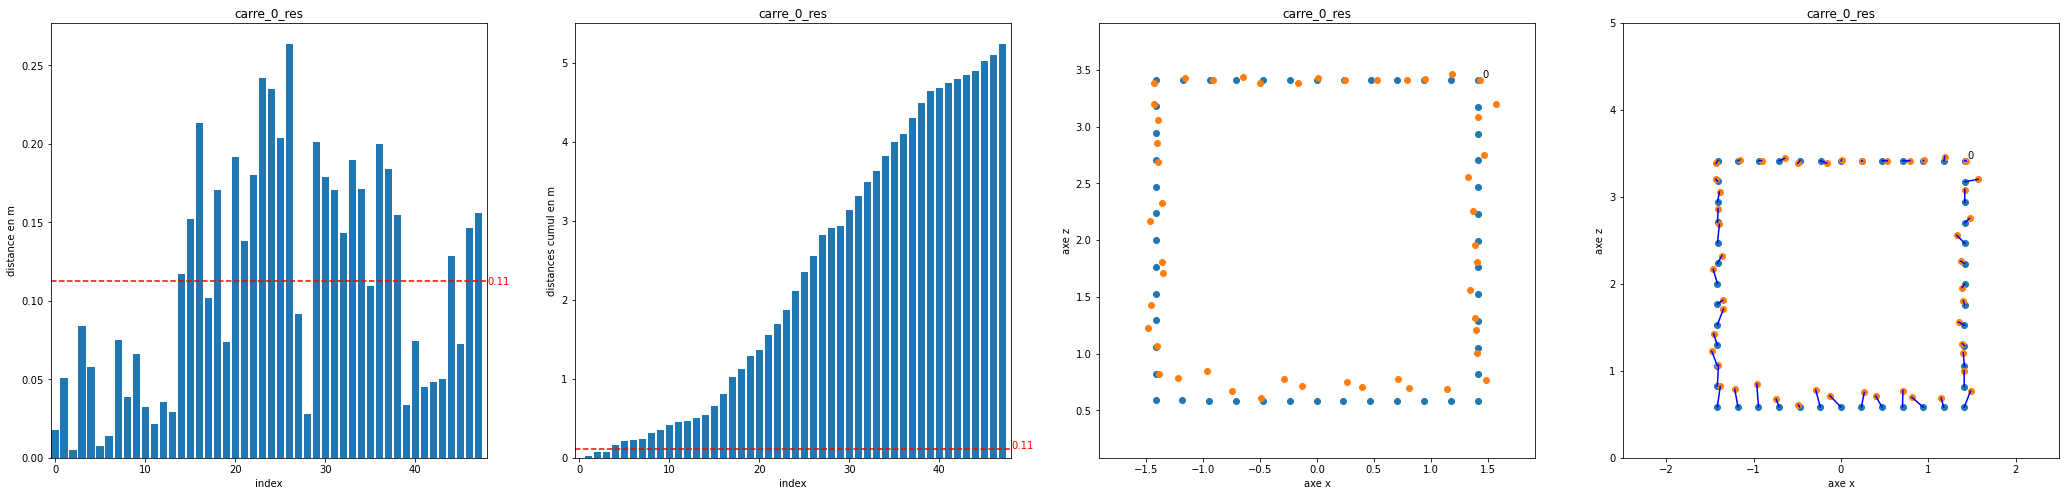

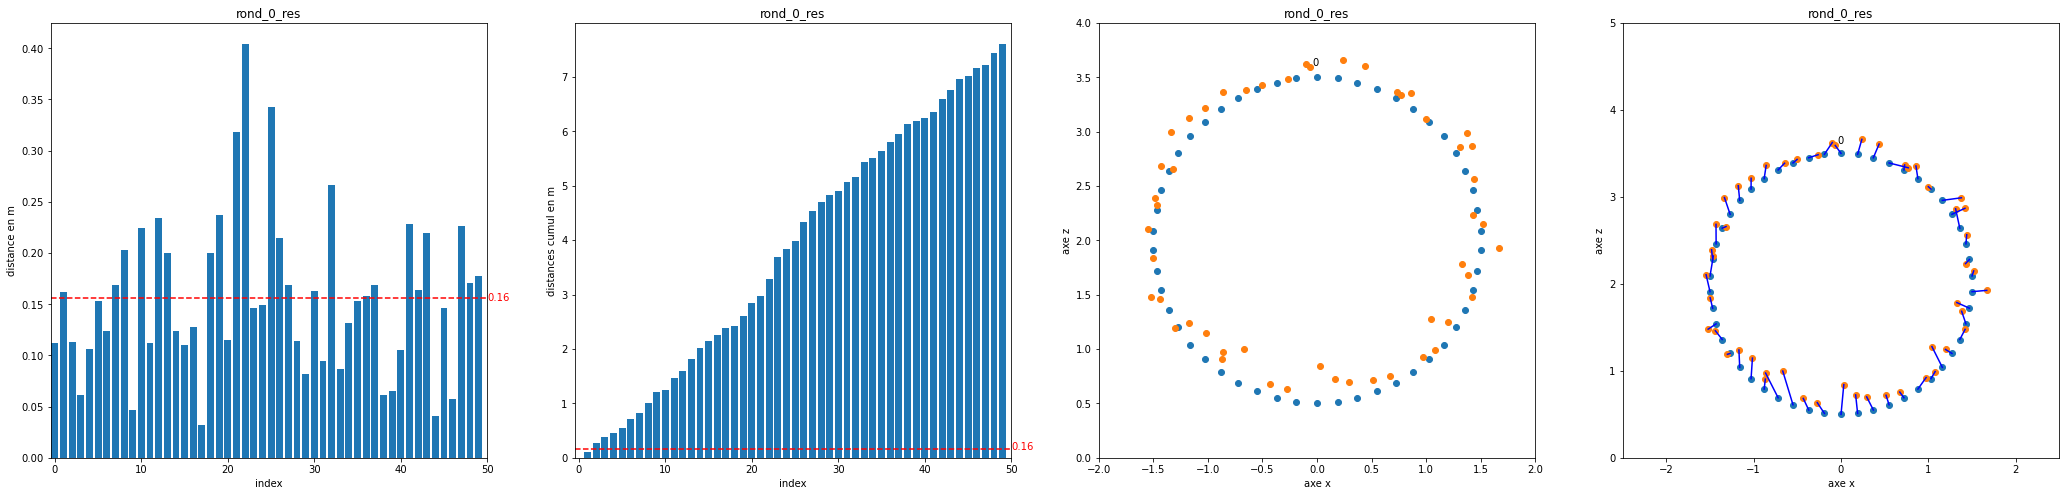

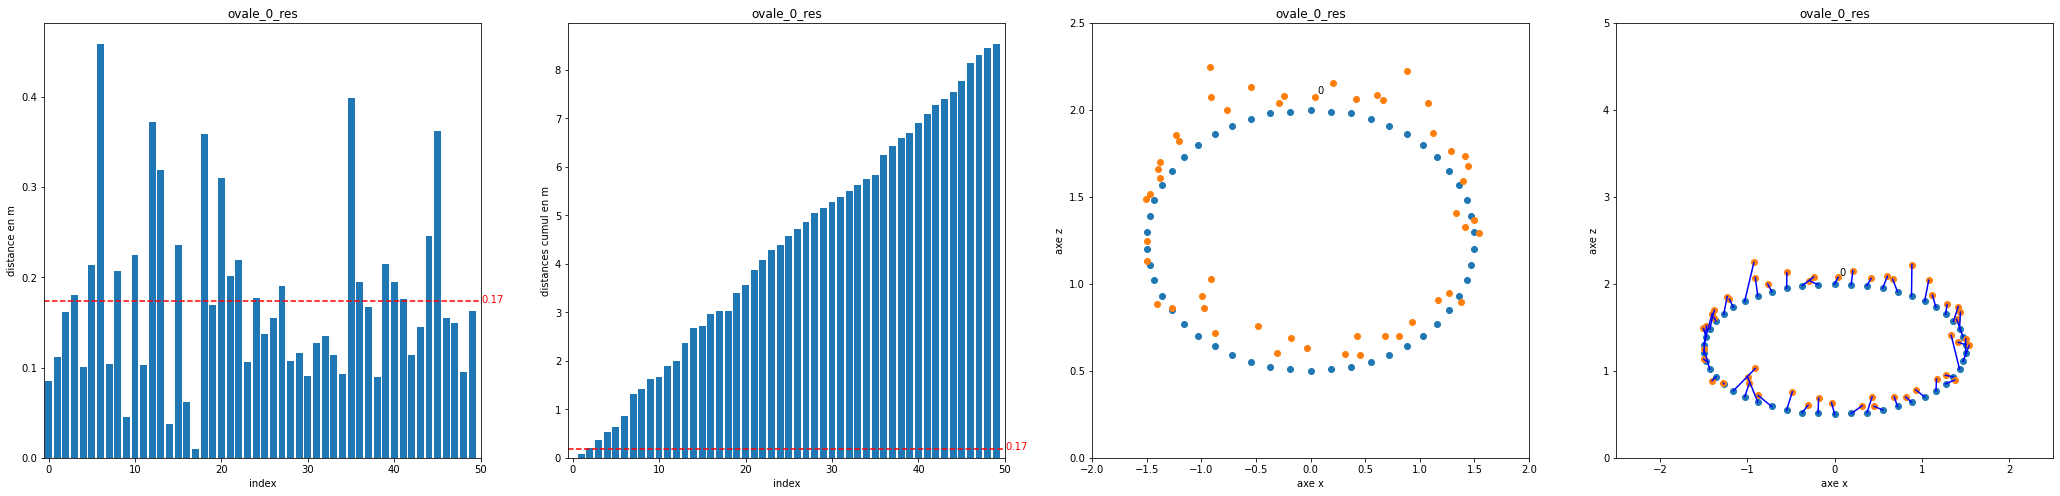

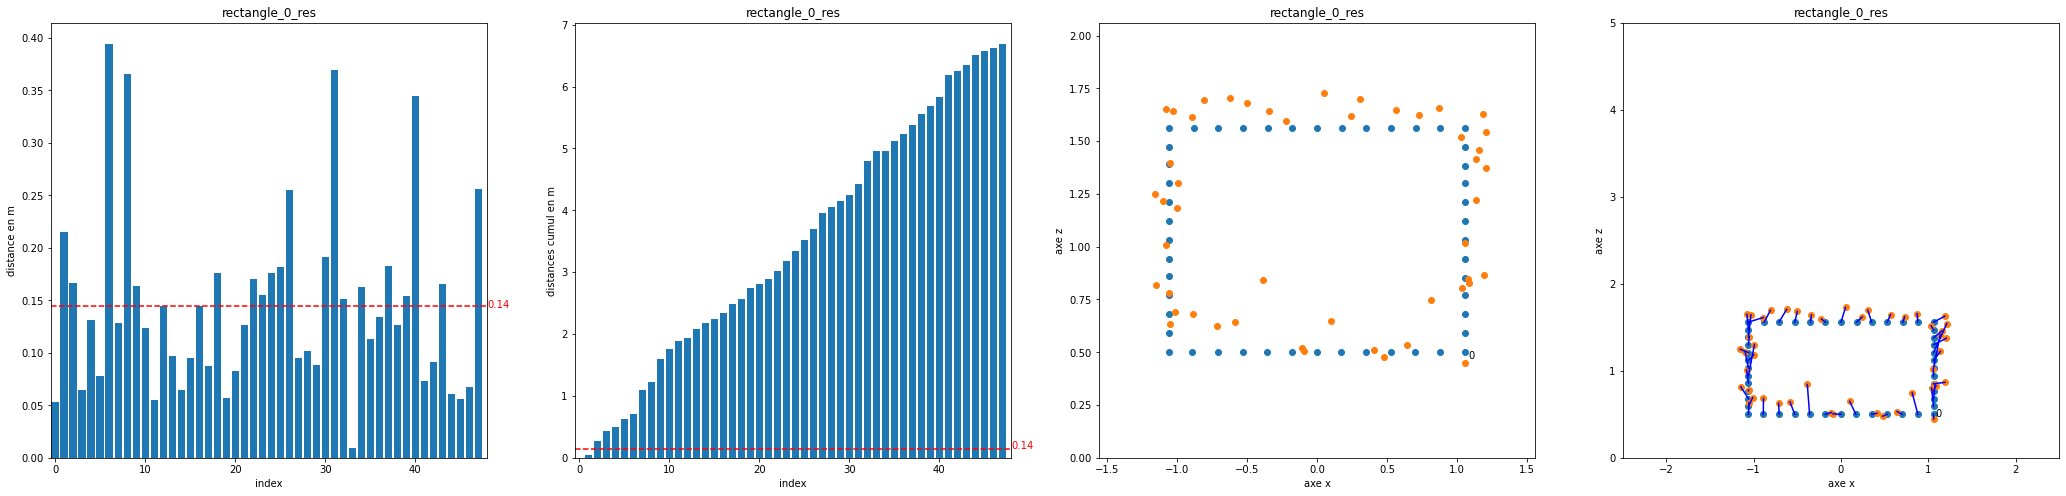

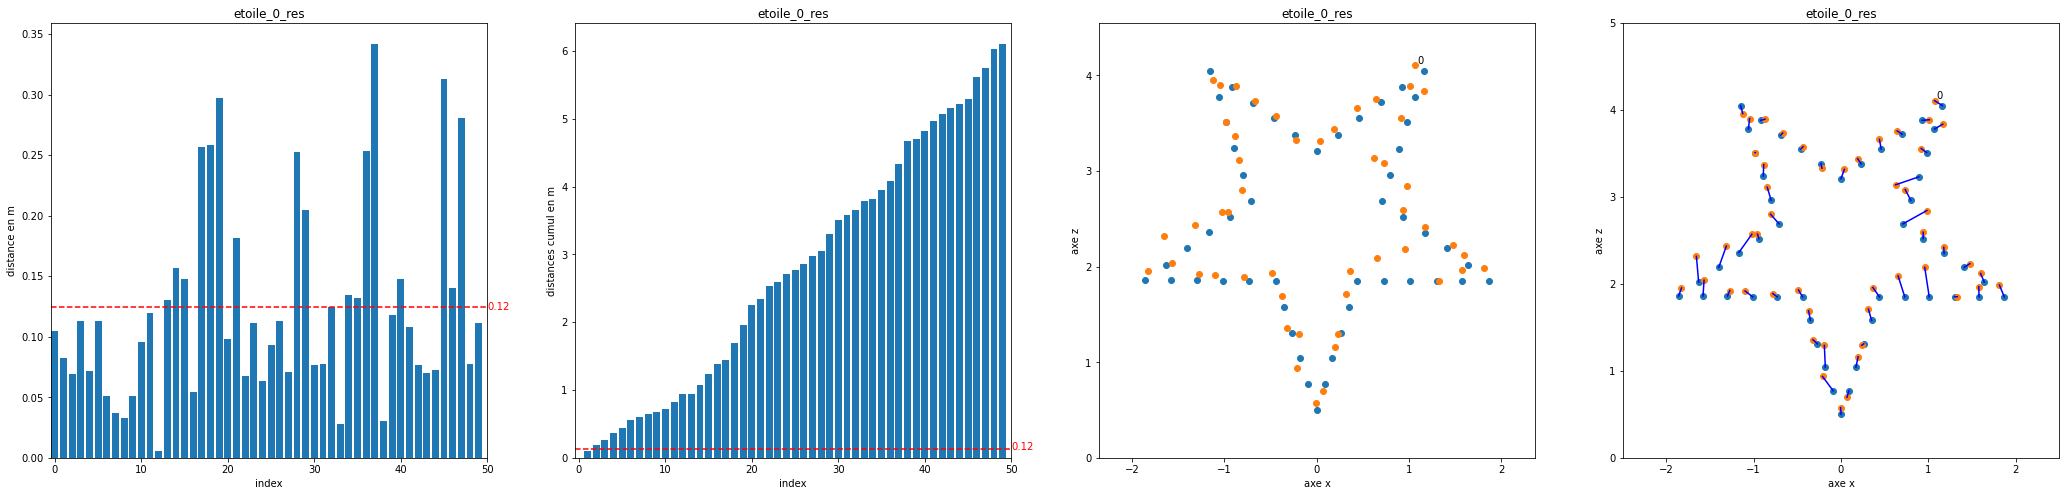

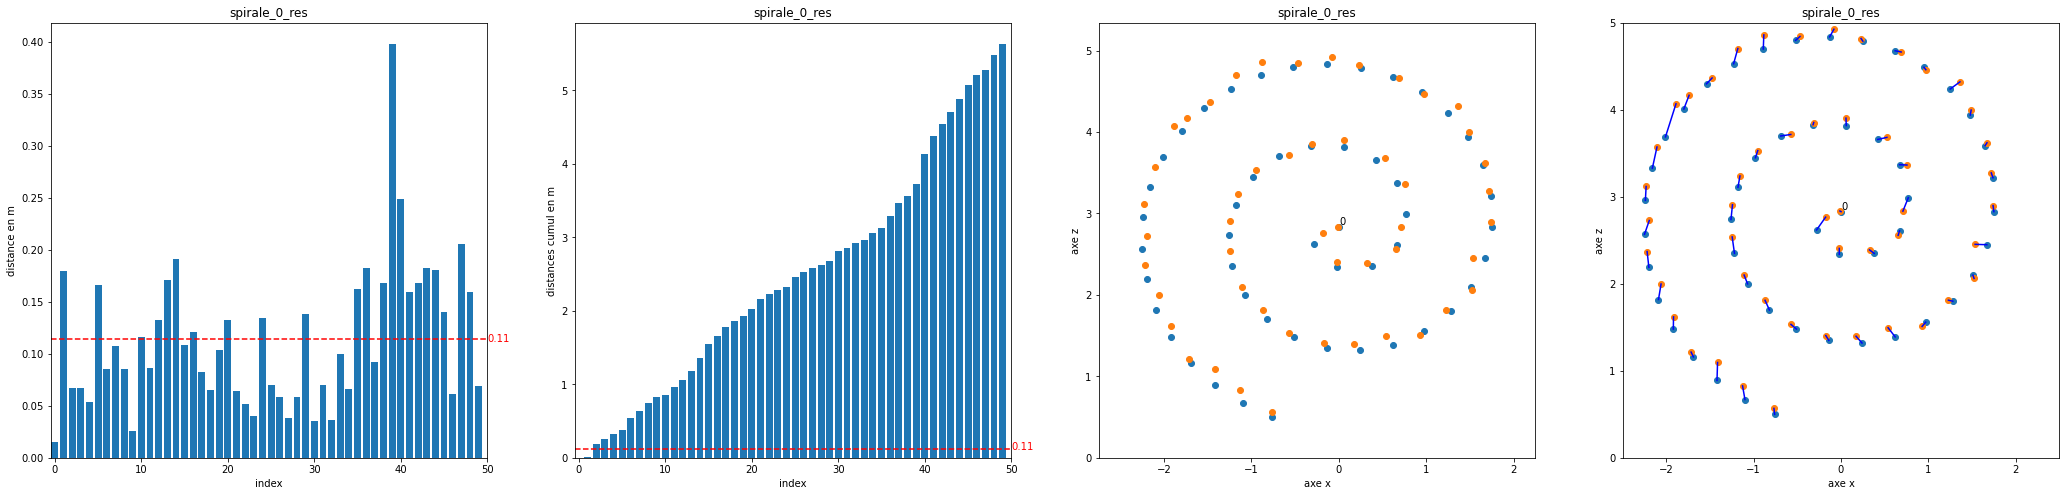

In [19]:
carre_0_df, carre_0_distList = annalyseResFile("carre_0_res.txt")
rond_0_df, rond_0_distList = annalyseResFile("rond_0_res.txt")
ovale_0_df, ovale_0_distList = annalyseResFile("ovale_0_res.txt")
rectangle_0_df, rectangle_0_distList = annalyseResFile("rectangle_0_res.txt")
etoile_0_df, etoile_0_distList = annalyseResFile("etoile_0_res.txt")
spirale_0_df, spirale_0_distList = annalyseResFile("spirale_0_res.txt")

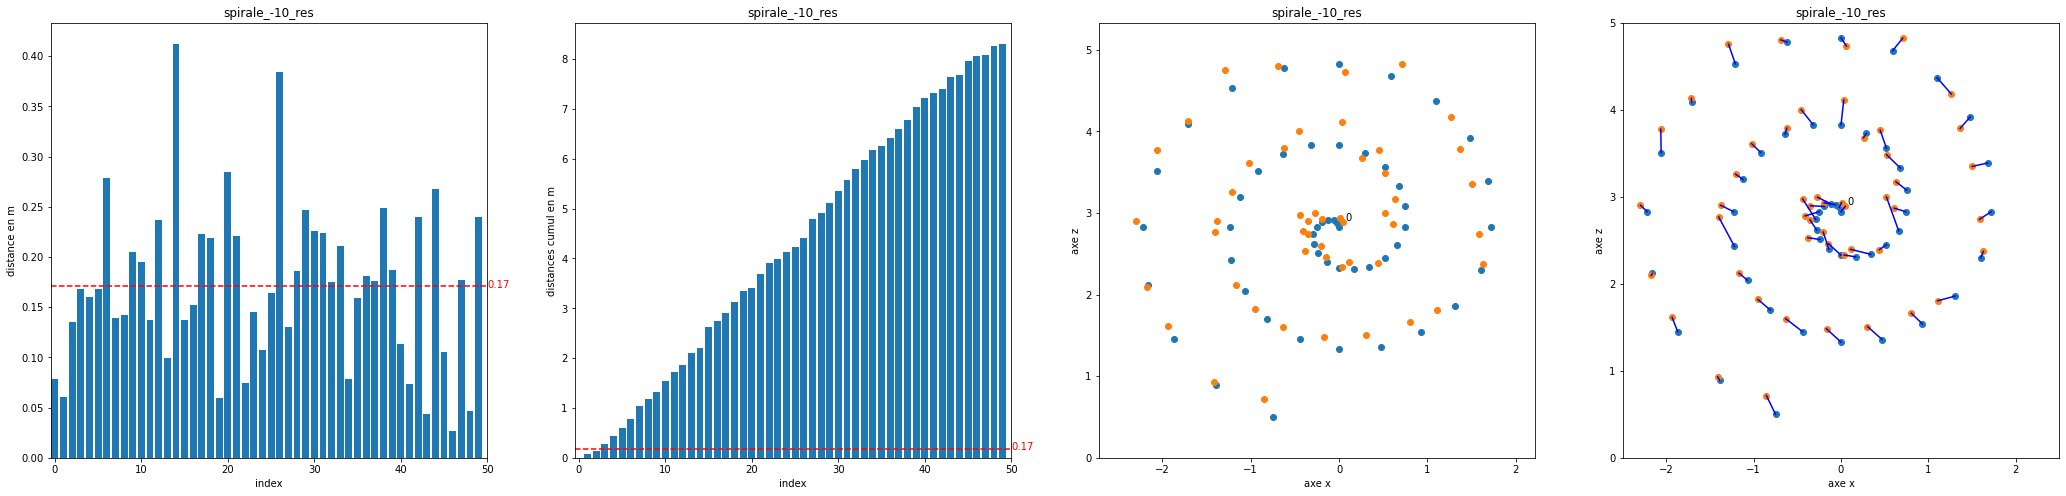

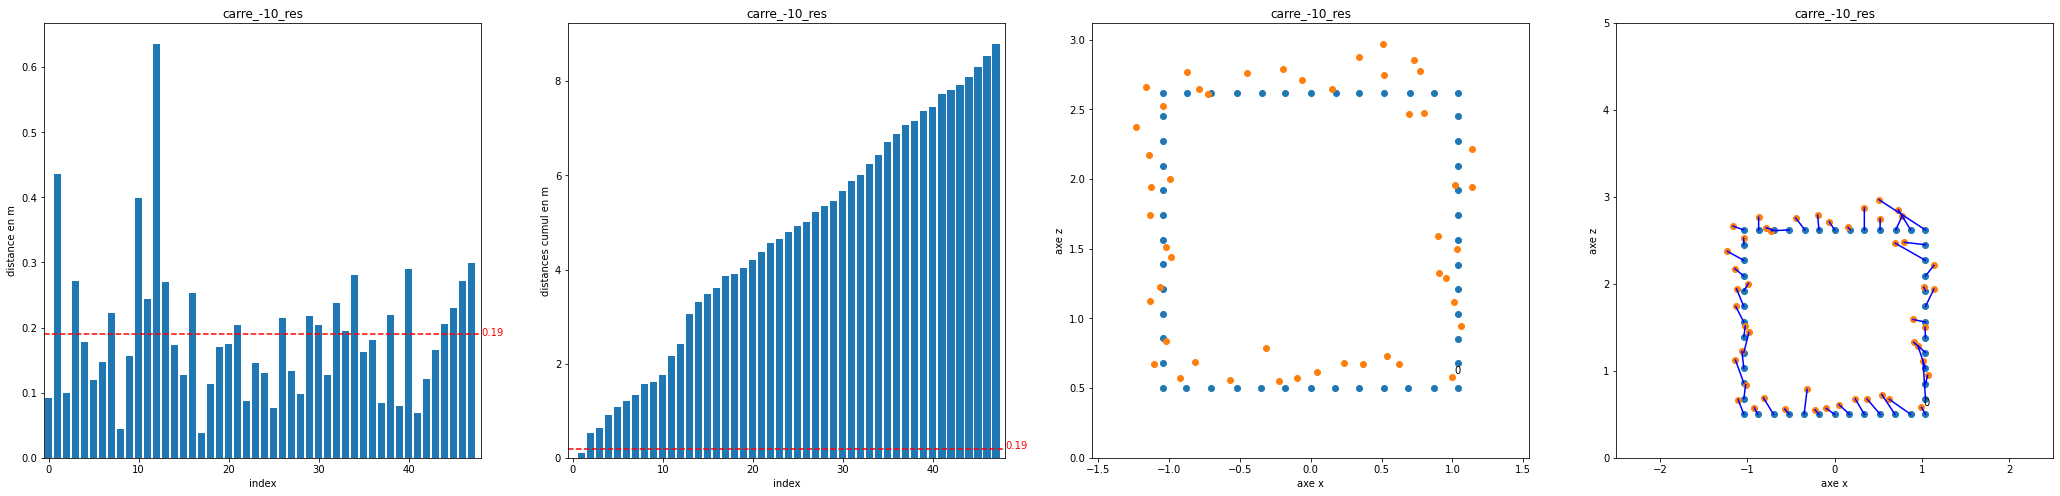

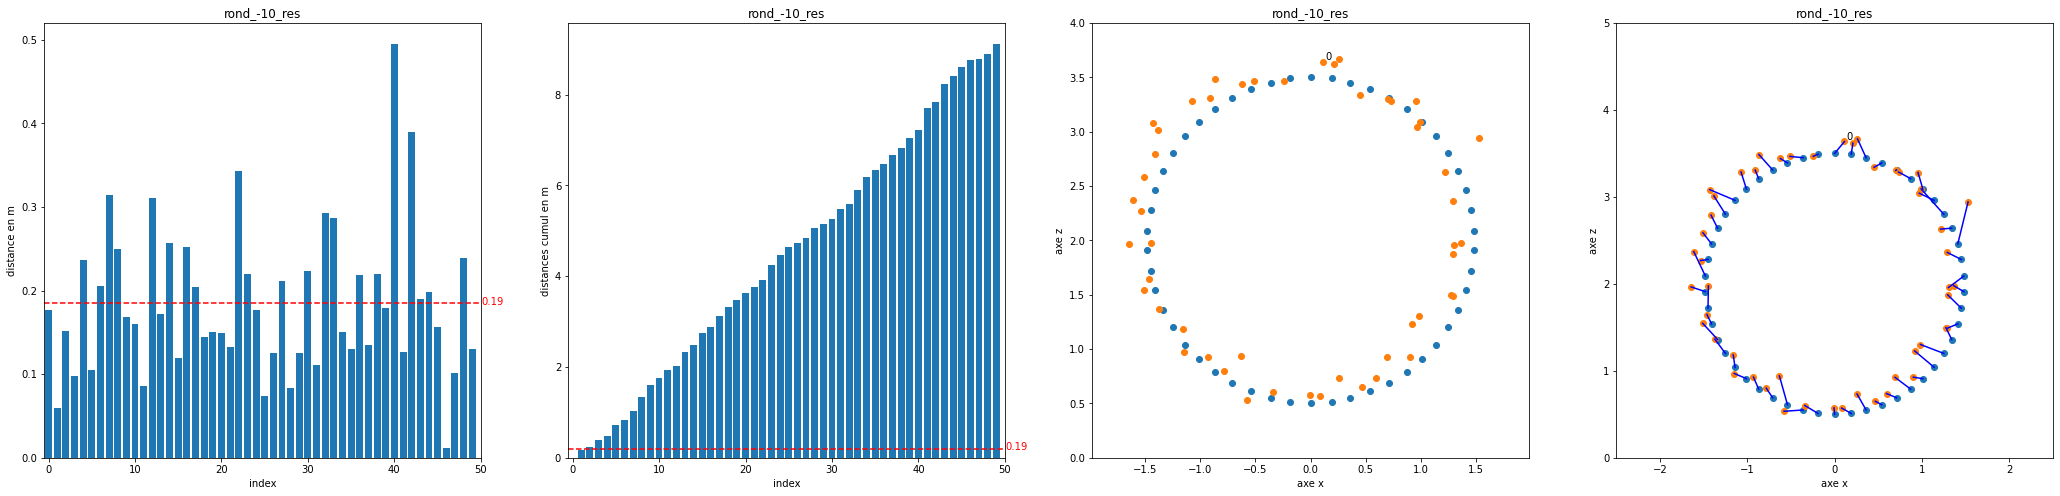

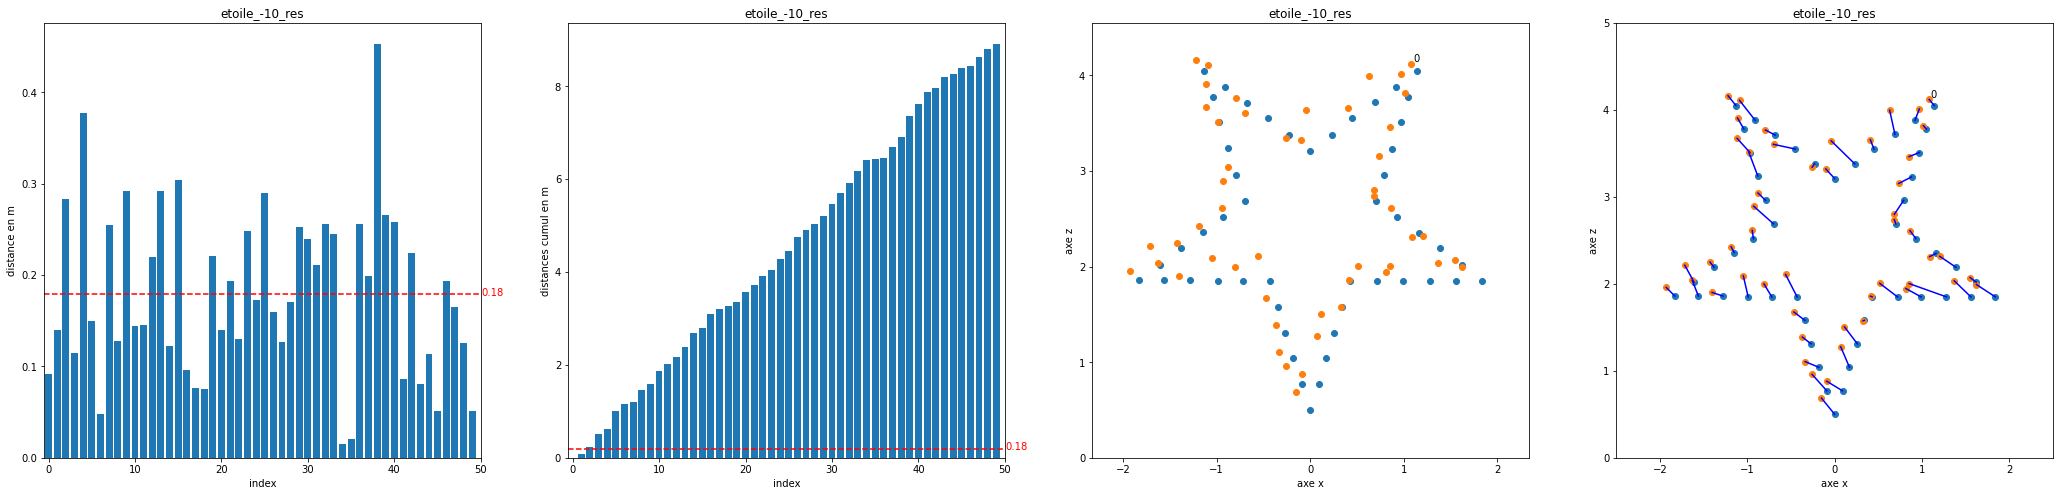

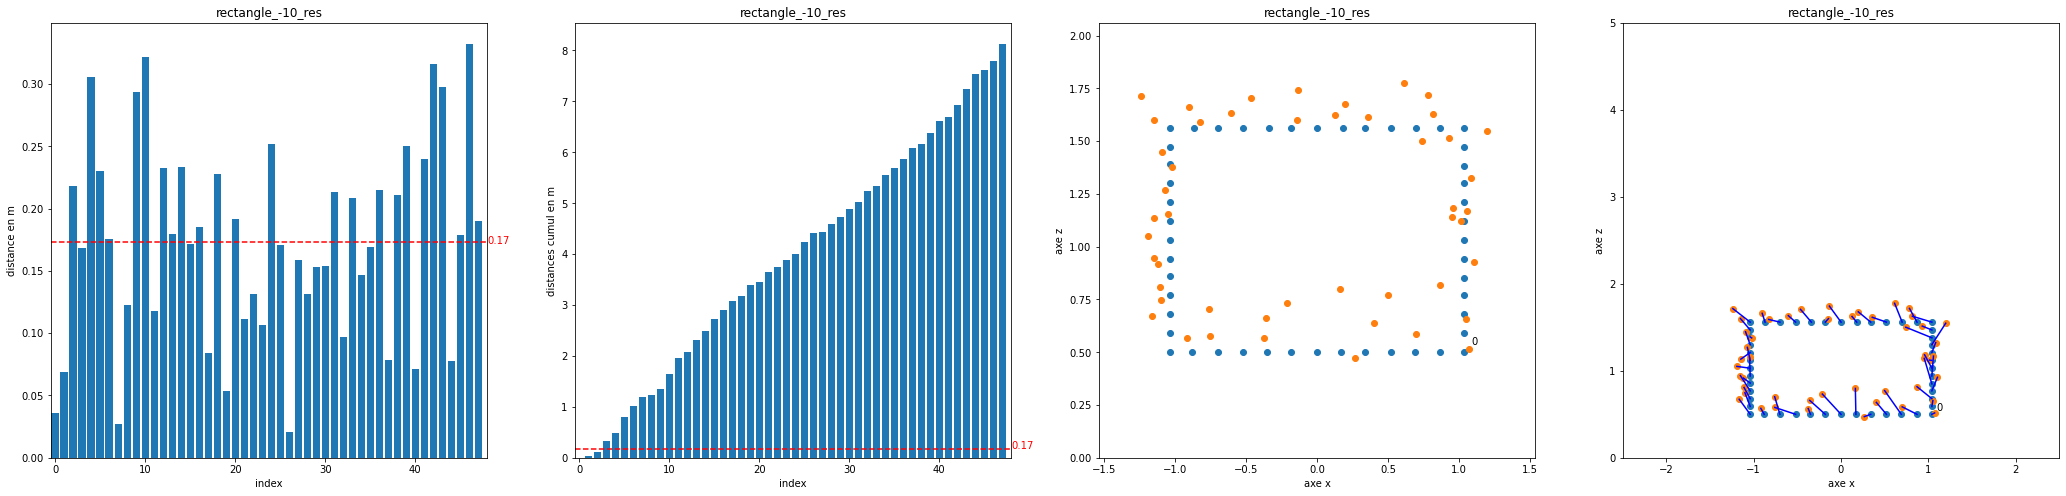

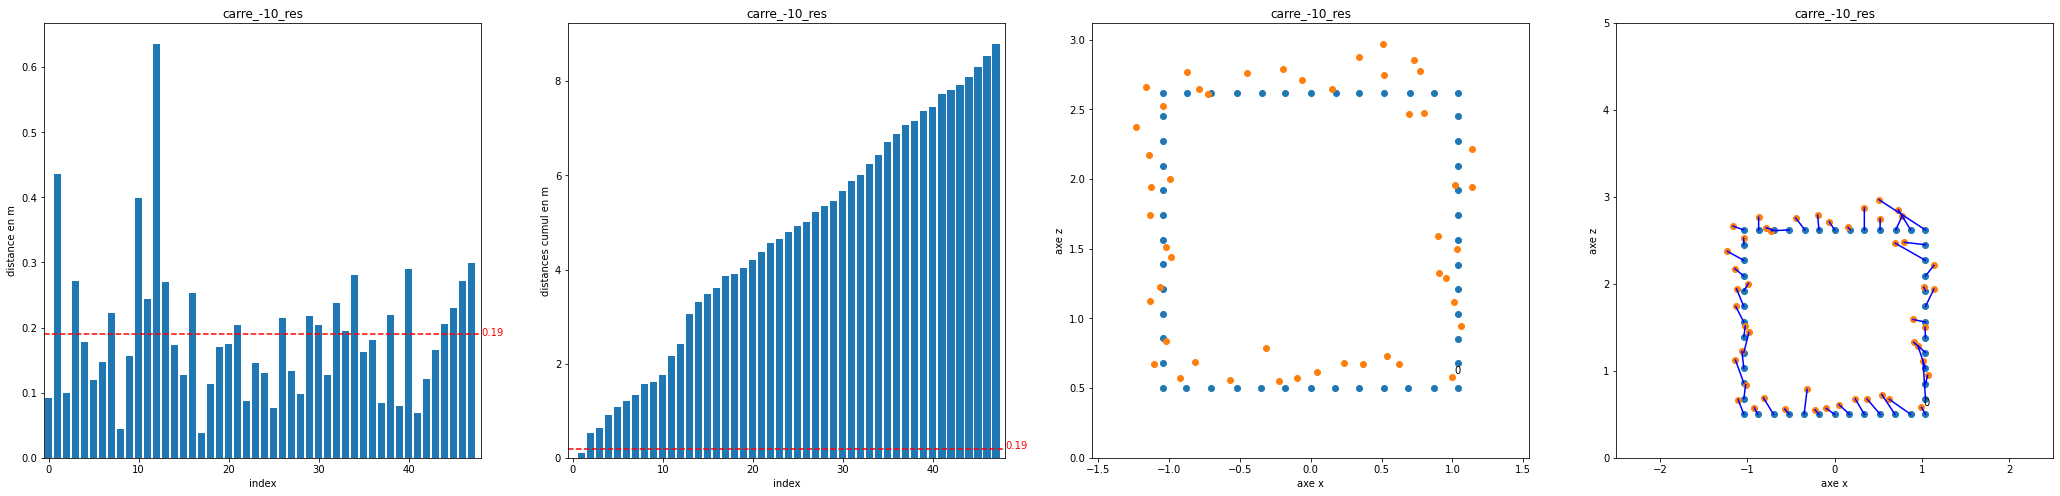

In [20]:
spirale_10neg_df, spirale_10neg_distList = annalyseResFile("spirale_-10_res.txt")
carre_10neg_df, carre_10neg_distList = annalyseResFile("carre_-10_res.txt")
rond_10neg_df, rond_10neg_distList = annalyseResFile("rond_-10_res.txt")
etoile_10neg_df, etoile_10neg_distList = annalyseResFile("etoile_-10_res.txt")
rectangle_10neg_df, rectangle_10neg_distList = annalyseResFile("rectangle_-10_res.txt")
carre_10neg_df, carre_10neg_distList = annalyseResFile("carre_-10_res.txt")

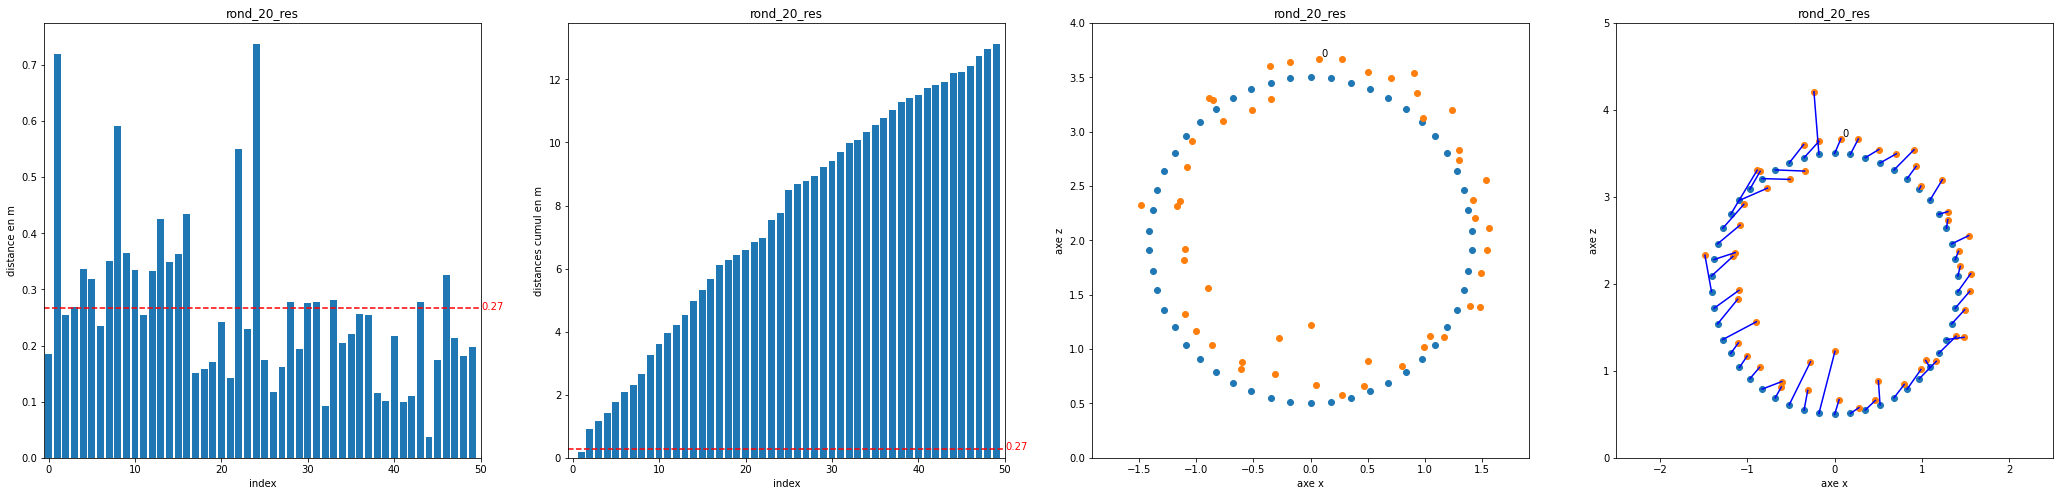

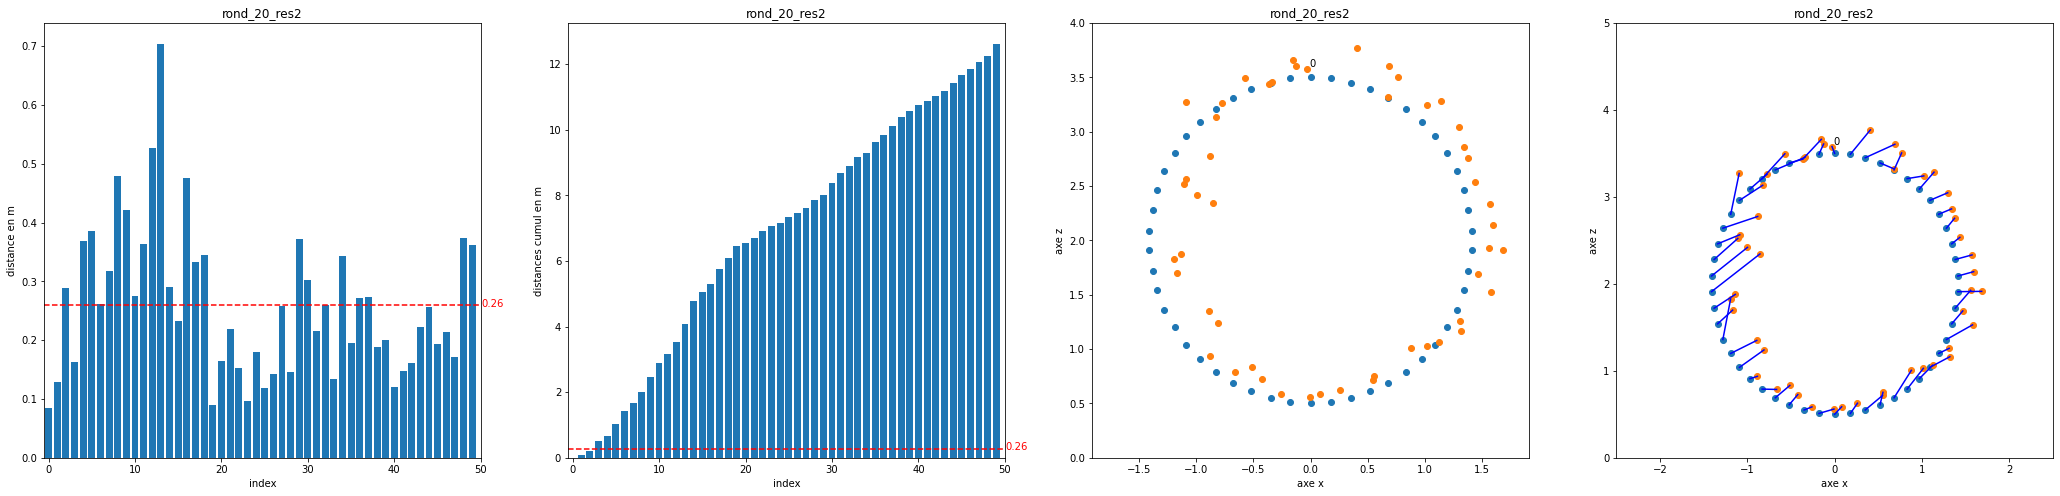

In [21]:
rond_20_df, rond_20_distList = annalyseResFile("rond_20_res.txt")
rond_20_df_2, rond_20_distList_2 = annalyseResFile("rond_20_res2.txt")

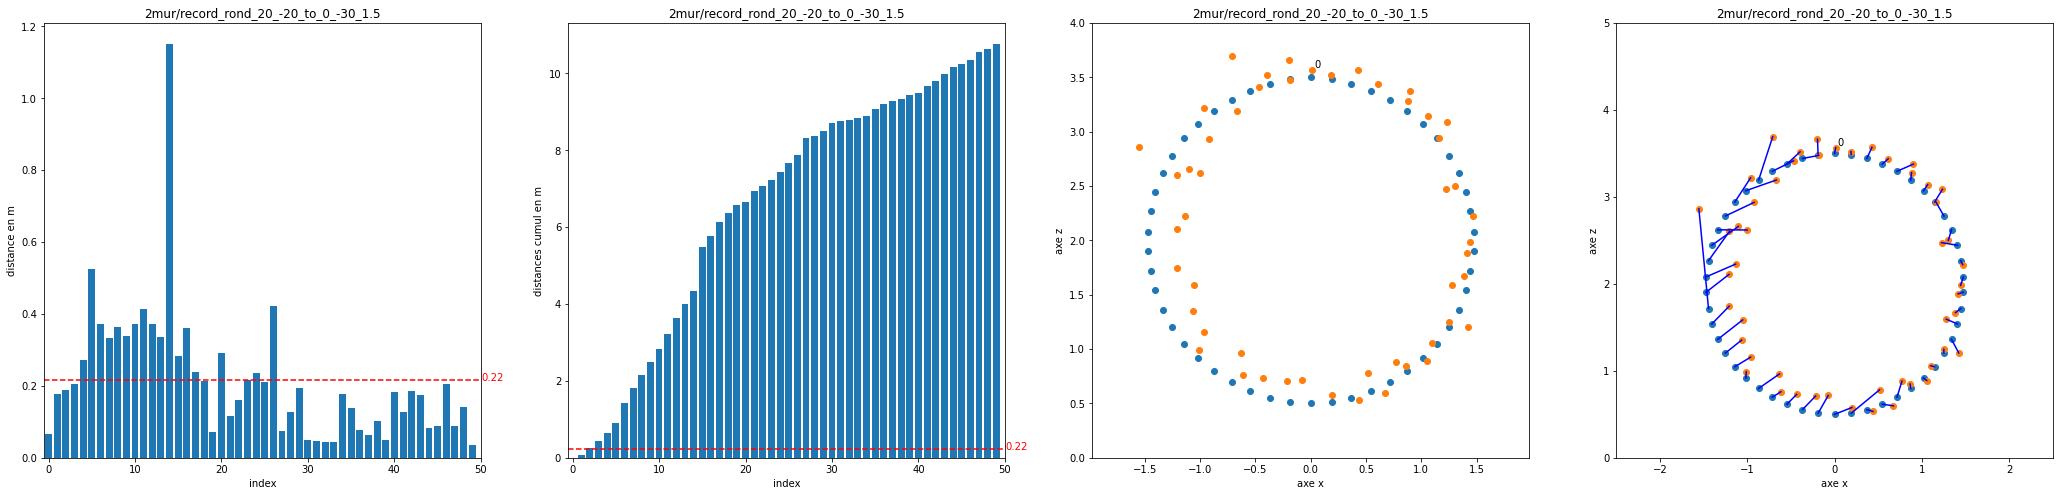

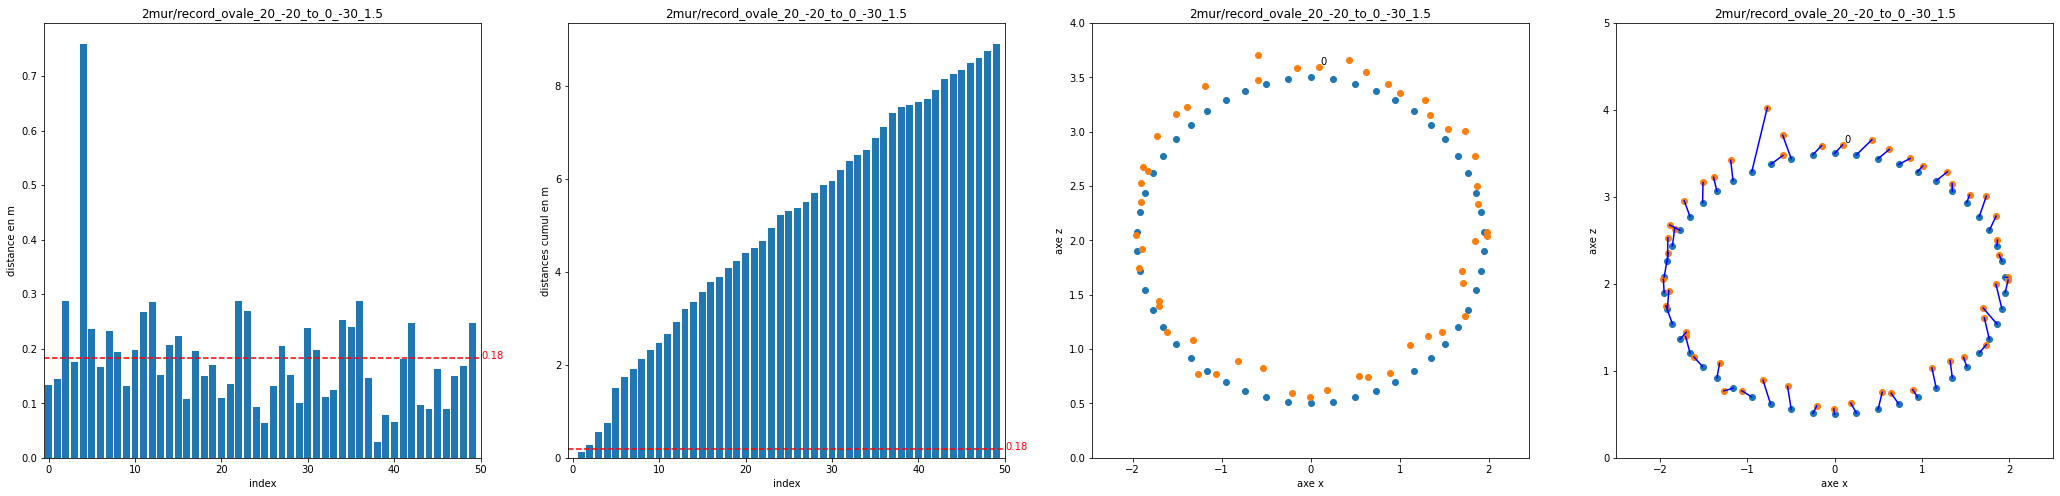

In [22]:
rond_20_20neg_df, rond_20_20neg_distList = annalyseResFile("2mur/record_rond_20_-20_to_0_-30_1.5.txt")
ovale_20_20neg_df, ovale_20_20neg_distList = annalyseResFile("2mur/record_ovale_20_-20_to_0_-30_1.5.txt")

In [5]:
data

['%time,field.target.x,field.target.y,field.target.z,field.impact.x,field.impact.y,field.impact.z,field.droneId',
 '12533000000,1.414,0.0,3.414,1.43157194288,-0.352403535713,3.41438663889,0',
 '20180000000,1.179,0.0,3.414,1.1883378532,-0.350748454032,3.46366506876,0',
 '25850000000,0.943,0.0,3.414,0.94538447014,-0.358252578703,3.41845381158,0',
 '32440000000,0.707,0.0,3.414,0.790924340359,-0.351059144732,3.41627691388,0',
 '38746000000,0.472,0.0,3.415,0.529806439447,-0.350498846907,3.41394454894,0',
 '46847000000,0.236,0.0,3.415,0.243247663008,-0.355864216376,3.41391017415,0',
 '60316000000,0.001,0.0,3.415,0.00758361557685,-0.349918532744,3.42739279763,0',
 '70422000000,-0.235,0.0,3.415,-0.165162317373,-0.352388971651,3.38752517867,0',
 '76703000000,-0.471,0.0,3.415,-0.495467357799,-0.351726383962,3.38511970564,0',
 '83467000000,-0.706,0.0,3.415,-0.645646672793,-0.350433810599,3.44272970199,0',
 '94268000000,-0.942,0.0,3.415,-0.909612388882,-0.350146209165,3.41580288632,0',
 '995390000

In [40]:
index = [1+10*i for i in range(int(len(data)/10))]

In [45]:
targetCoord = [[float(data[ind][5:10]), float(data[ind+1][5:10]), float(data[ind+2][5:10])] for ind in index]
impactCoord = [[float(data[ind+4][5:10]), float(data[ind+5][5:10]), float(data[ind+6][5:10])] for ind in index]

In [46]:
len(targetCoord)

48

In [53]:
def SE(target_coord, impact_coord):
    x_error = (target_coord[0]-impact_coord[0])**2
    z_error = (target_coord[2]-impact_coord[2])**2
    dist_error = np.sqrt(x_error+z_error)
    return dist_error

def MSE(target_array, impact_array):
    error = [SE(target_array[i], impact_array[i]) for i in range(len(target_array))]
    mse = 100*sum(error)/len(target_array)
    return np.round(mse,2), np.round(error, 4)

In [56]:
meanDist, distList = MSE(targetCoord, impactCoord)

<BarContainer object of 48 artists>

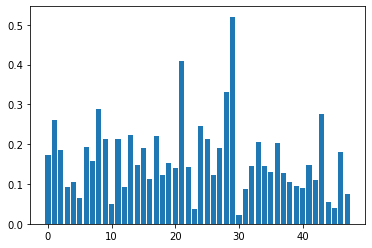

In [63]:
plt.bar(np.arange(len(distList)), distList)